In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import prophet
import seaborn as sns
import matplotlib.pyplot as plt
import random
from prophet import Prophet

In [4]:
df = pd.read_csv('avocado.csv')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
df.tail()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8801,11,2018-01-07,0.85,303963.18,167628.98,10026.09,409.67,125898.44,108075.96,16240.96,1581.52,conventional,2018.0,Nashville
8802,0,2018-03-25,1.04,305105.53,171335.77,20076.04,2425.10,111268.62,94895.33,15963.29,410.00,conventional,2018.0,NewOrleansMobile
8803,1,2018-03-18,1.02,316969.55,181011.25,19002.68,2515.00,114440.62,95470.29,18533.66,436.67,conventional,2018.0,NewOrleansMobile
8804,2,2018-03-11,1.05,316463.18,177320.17,22478.10,2158.00,114506.91,93807.58,20352.66,346.67,conventional,2018.0,NewOrleansMobile
8805,3,2018-03-04,1.03,332378.96,190521.47,24646.65,2564.00,114646.00,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8806 non-null   int64  
 1   Date          8806 non-null   object 
 2   AveragePrice  8806 non-null   float64
 3   Total Volume  8806 non-null   float64
 4   4046          8806 non-null   float64
 5   4225          8806 non-null   float64
 6   4770          8806 non-null   float64
 7   Total Bags    8806 non-null   float64
 8   Small Bags    8805 non-null   float64
 9   Large Bags    8805 non-null   float64
 10  XLarge Bags   8805 non-null   float64
 11  type          8805 non-null   object 
 12  year          8805 non-null   float64
 13  region        8805 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 963.3+ KB


In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,8806.000000,8806.000000,8.806000e+03,8.806000e+03,8.806000e+03,8.806000e+03,8.806000e+03,8.805000e+03,8.805000e+03,8805.000000,8805.000000
mean,24.915739,1.159129,1.602499e+06,5.604999e+05,5.630660e+05,4.572764e+04,4.332052e+05,3.329706e+05,9.429914e+04,5971.613146,2016.080409
std,15.326066,0.265126,4.571666e+06,1.684420e+06,1.620211e+06,1.489493e+05,1.270864e+06,9.692762e+05,3.074670e+05,23469.065973,0.886639
min,0.000000,0.460000,3.369968e+04,7.206000e+01,1.518000e+03,0.000000e+00,3.047170e+03,1.119180e+03,0.000000e+00,0.000000,2015.000000
25%,11.000000,0.980000,1.964016e+05,3.071882e+04,5.095969e+04,5.289300e+02,5.662915e+04,4.276225e+04,2.181760e+03,0.000000,2015.000000
50%,25.000000,1.130000,4.013484e+05,1.031186e+05,1.344967e+05,6.177595e+03,9.650254e+04,7.415979e+04,1.362757e+04,103.880000,2016.000000
75%,38.000000,1.320000,1.017747e+06,3.571675e+05,4.126353e+05,2.187285e+04,2.872228e+05,2.018743e+05,5.795665e+04,2334.140000,2017.000000
max,52.000000,2.220000,6.103446e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.629830e+07,1.256716e+07,4.324231e+06,551693.650000,2018.000000


In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      1
Large Bags      1
XLarge Bags     1
type            1
year            1
region          1
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df = df.sort_values('Date')

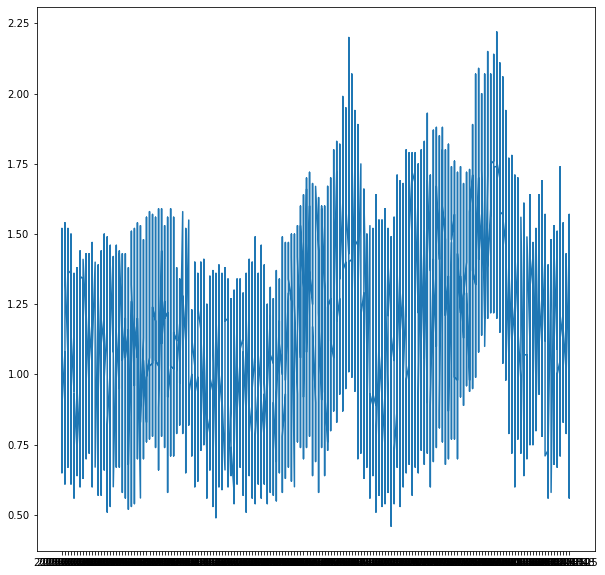

In [12]:
plt.figure(figsize = (10, 10))
plt.plot(df['Date'], df['AveragePrice'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


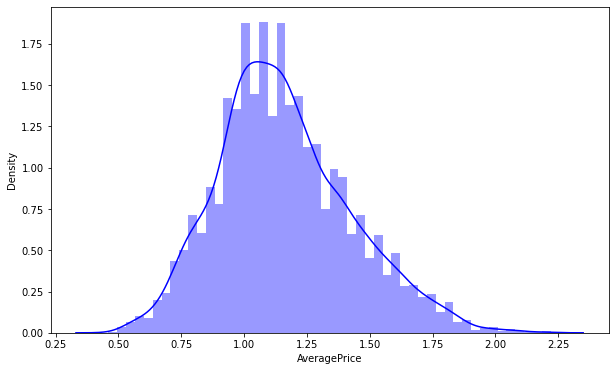

In [13]:
plt.figure(figsize = (10, 6))
sns.distplot(df['AveragePrice'], color = 'b')

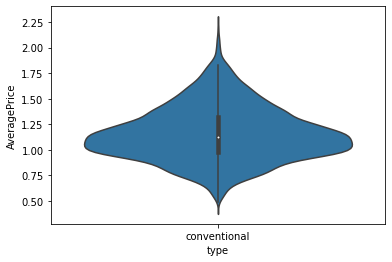

In [14]:
sns.violinplot(y = 'AveragePrice', x = 'type', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

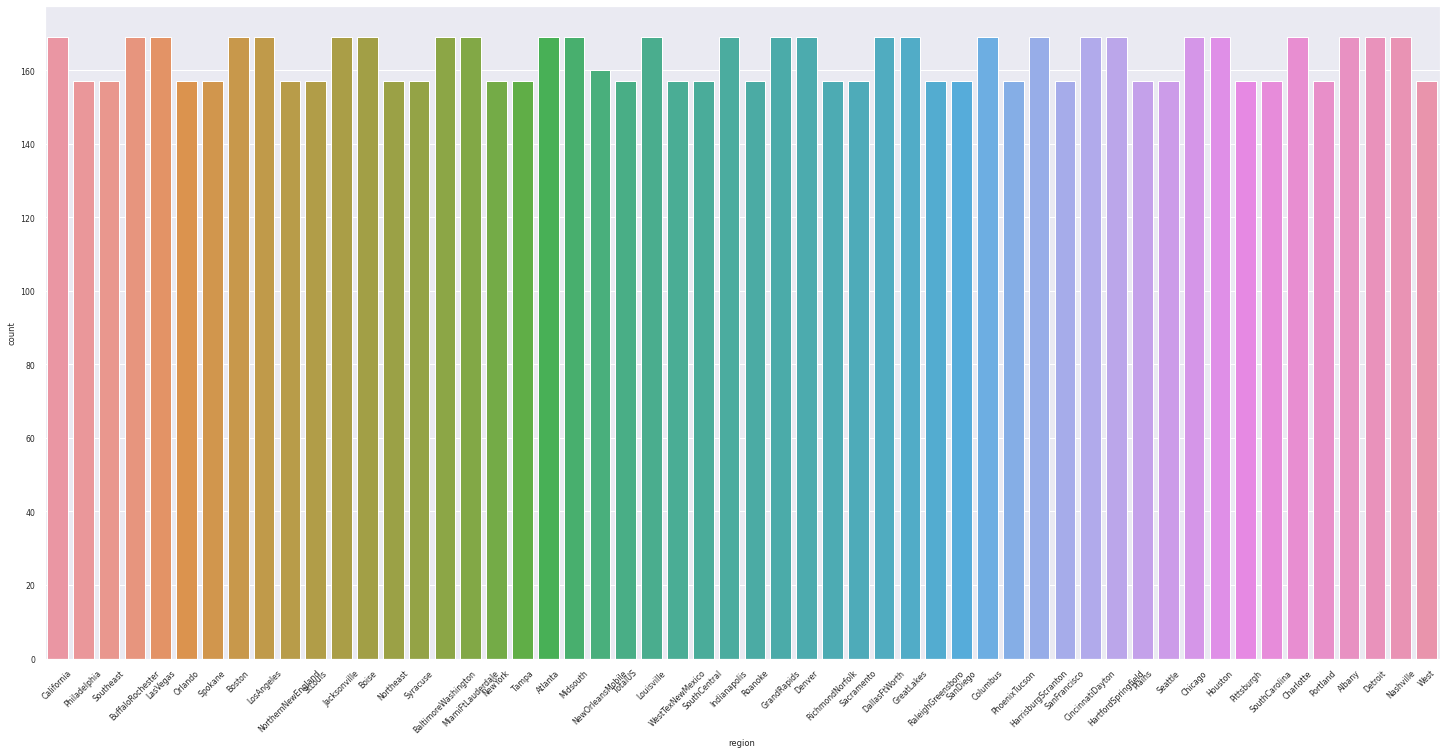

In [15]:

sns.set(font_scale = 0.7)
plt.figure(figsize = (25, 12))
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

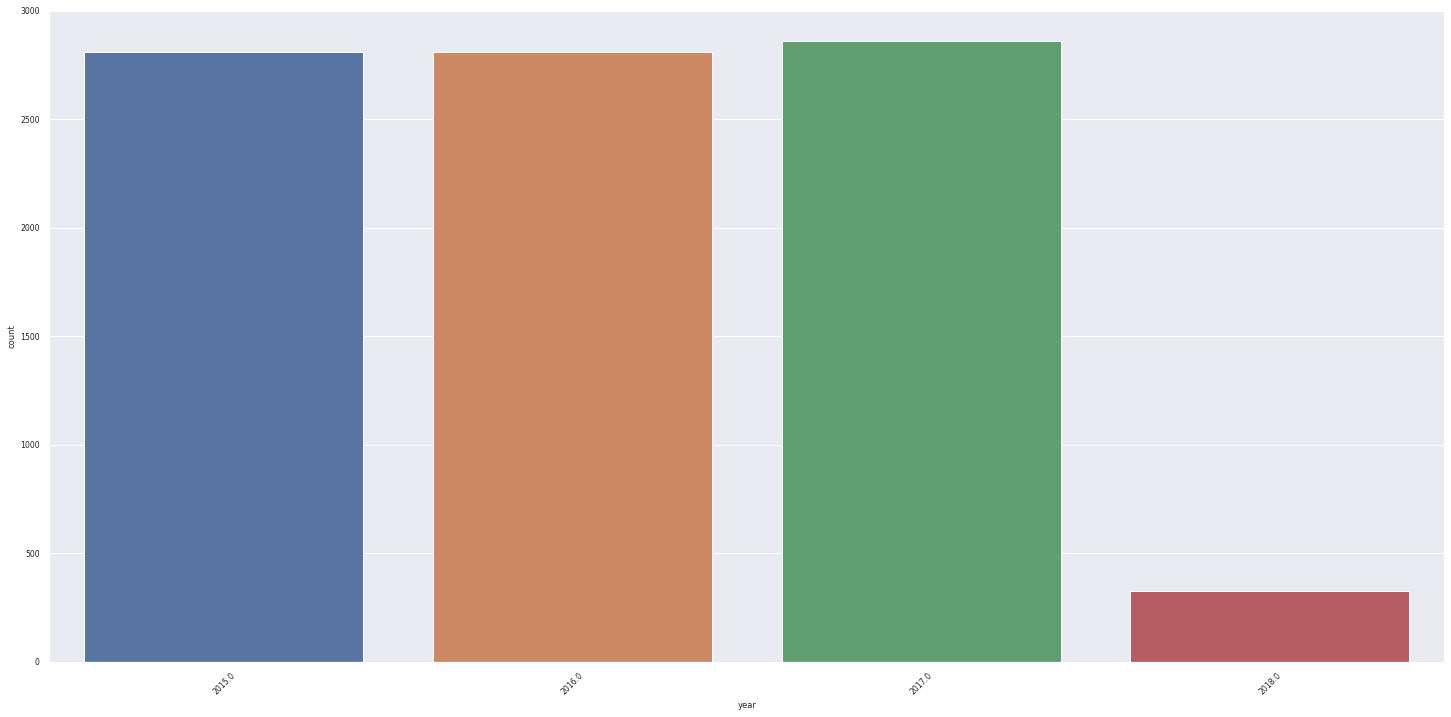

In [16]:

sns.set(font_scale = 0.7)
plt.figure(figsize = (25, 12))
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


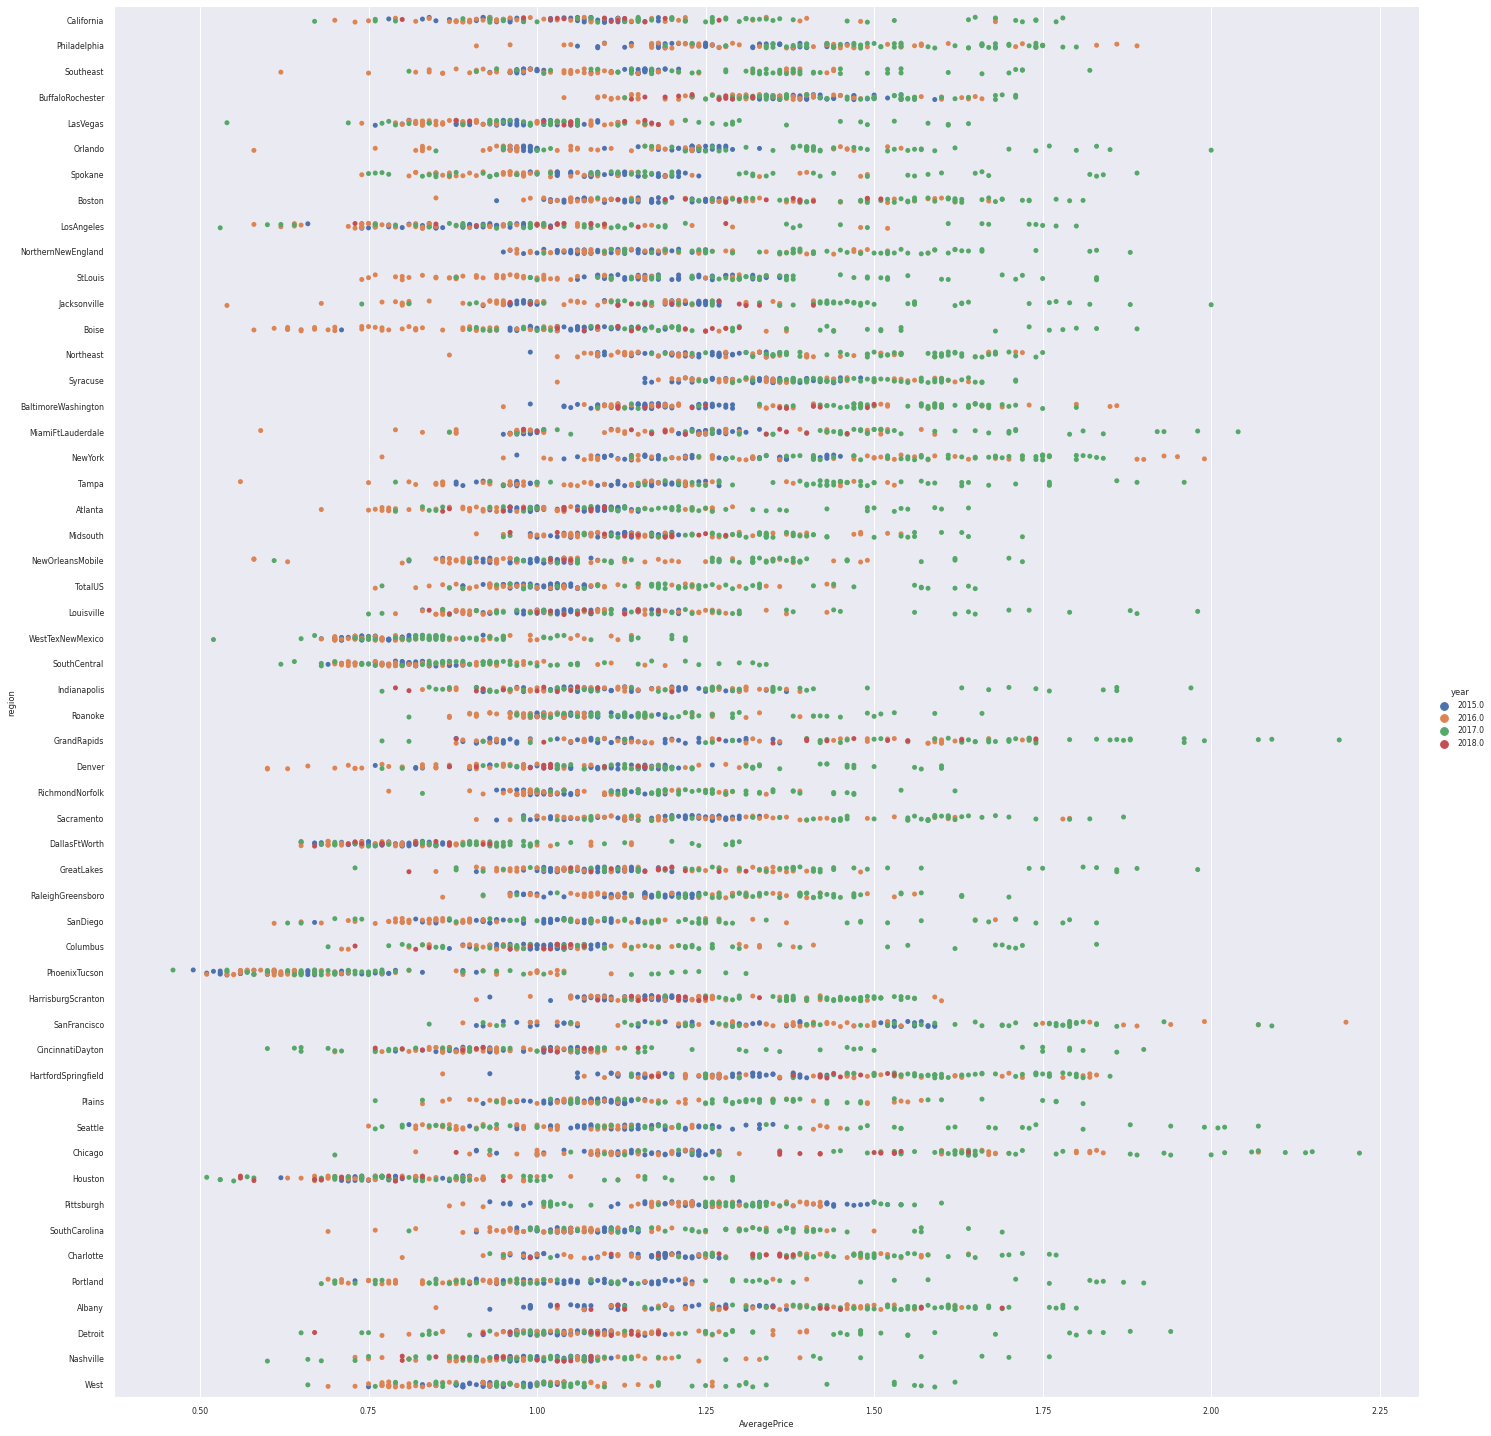

In [17]:
conventional = sns.catplot('AveragePrice', 'region', data = df[df['type'] == 'conventional'], hue = 'year', height = 20)


In [19]:
dfp = df[['Date', 'AveragePrice']]

In [20]:
dfp.head()

,Date,AveragePrice
363,2015-01-04,0.93
1715,2015-01-04,1.10
2443,2015-01-04,0.98
311,2015-01-04,1.40
1143,2015-01-04,0.80


In [21]:
dfp = dfp.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})

In [22]:
dfp.head()

,ds,y
363,2015-01-04,0.93
1715,2015-01-04,1.10
2443,2015-01-04,0.98
311,2015-01-04,1.40
1143,2015-01-04,0.80


In [23]:
dfp.head()

,ds,y
363,2015-01-04,0.93
1715,2015-01-04,1.10
2443,2015-01-04,0.98
311,2015-01-04,1.40
1143,2015-01-04,0.80


In [24]:
model = Prophet()
model.fit(dfp)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qi2rkz7/9vrm32q8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qi2rkz7/eofcsz4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89040', 'data', 'file=/tmp/tmp5qi2rkz7/9vrm32q8.json', 'init=/tmp/tmp5qi2rkz7/eofcsz4q.json', 'output', 'file=/tmp/tmp5qi2rkz7/prophet_modelyfasmik5/prophet_model-20230121185756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:57:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:58:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)

In [26]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.253223,0.848256,1.397063,1.253223,1.253223,-0.135329,-0.135329,-0.135329,-0.135329,-0.135329,-0.135329,0.0,0.0,0.0,1.117894
1,2015-01-11,1.247357,0.833866,1.372348,1.247357,1.247357,-0.124603,-0.124603,-0.124603,-0.124603,-0.124603,-0.124603,0.0,0.0,0.0,1.122754
2,2015-01-18,1.241491,0.836214,1.405789,1.241491,1.241491,-0.126858,-0.126858,-0.126858,-0.126858,-0.126858,-0.126858,0.0,0.0,0.0,1.114633
3,2015-01-25,1.235625,0.802630,1.351274,1.235625,1.235625,-0.157027,-0.157027,-0.157027,-0.157027,-0.157027,-0.157027,0.0,0.0,0.0,1.078599
4,2015-02-01,1.229759,0.760655,1.289814,1.229759,1.229759,-0.201802,-0.201802,-0.201802,-0.201802,-0.201802,-0.201802,0.0,0.0,0.0,1.027957


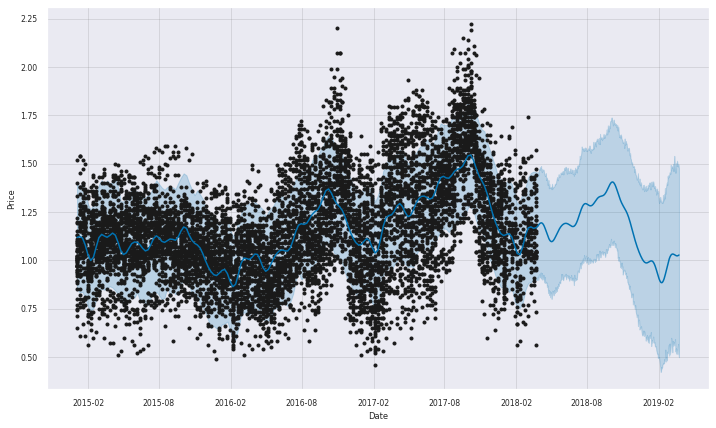

In [27]:
figure = model.plot(forecast, ylabel = 'Price', xlabel = 'Date')

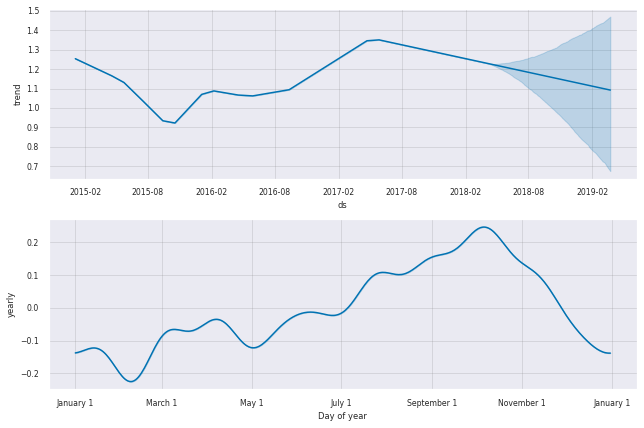

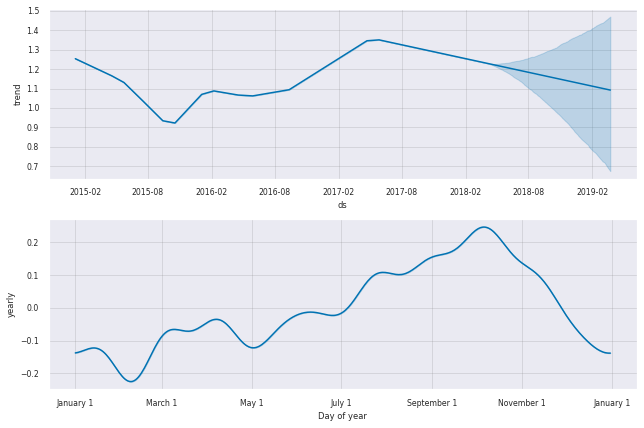

In [28]:
model.plot_components(forecast)

In [29]:
df_sample = df[df['region'] == 'West']

In [30]:
df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015.0,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015.0,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015.0,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015.0,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015.0,West


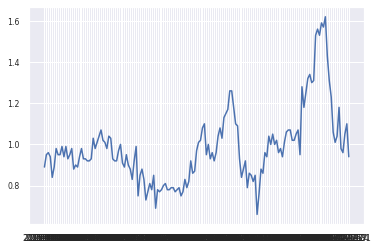

In [31]:
df_sample = df_sample.sort_values('Date')
     

plt.plot(df_sample['Date'], df_sample['AveragePrice'])

In [32]:
df_sample = df_sample.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})
     

df_sample = df_sample[['ds', 'y']]

In [33]:
df_sample.head()

,ds,y
2755,2015-01-04,0.89
2754,2015-01-11,0.95
2753,2015-01-18,0.96
2752,2015-01-25,0.94
2751,2015-02-01,0.84


In [34]:
m = Prophet()
m.fit(df_sample)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qi2rkz7/0ghs_6xy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qi2rkz7/bapksy6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35487', 'data', 'file=/tmp/tmp5qi2rkz7/0ghs_6xy.json', 'init=/tmp/tmp5qi2rkz7/bapksy6b.json', 'output', 'file=/tmp/tmp5qi2rkz7/prophet_modelcb11gzpl/prophet_model-20230121185812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:58:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:58:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
future_sample = m.make_future_dataframe(periods = 365)
forecast_sample = m.predict(future_sample)


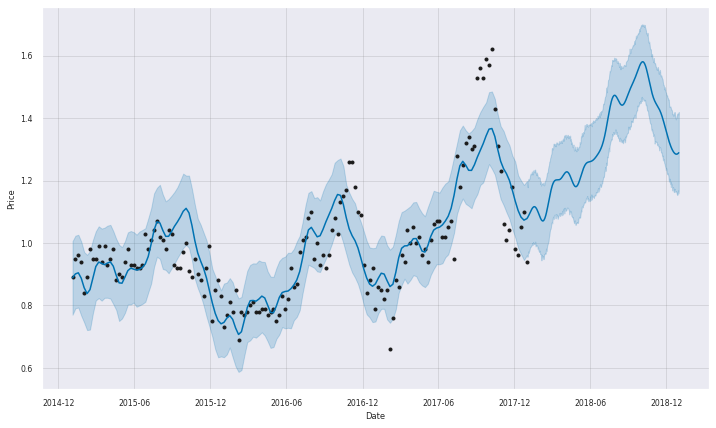

In [36]:
figure = m.plot(forecast_sample, ylabel = 'Price', xlabel = 'Date')

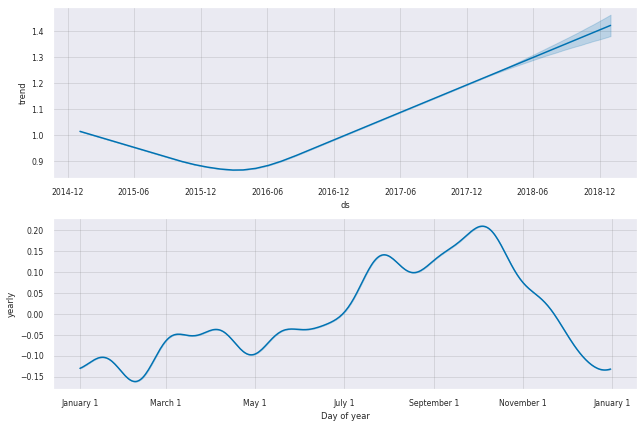

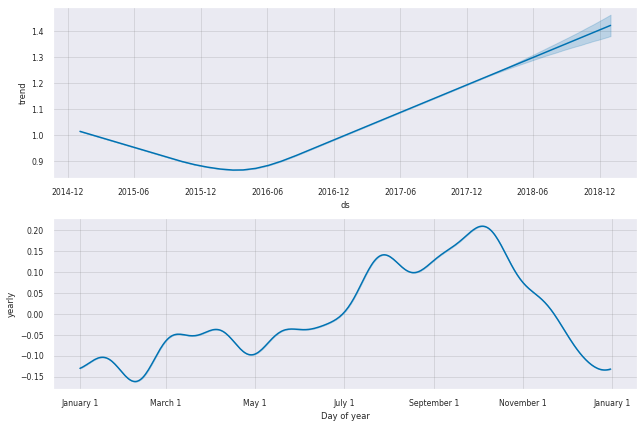

In [37]:
m.plot_components(forecast_sample)